# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


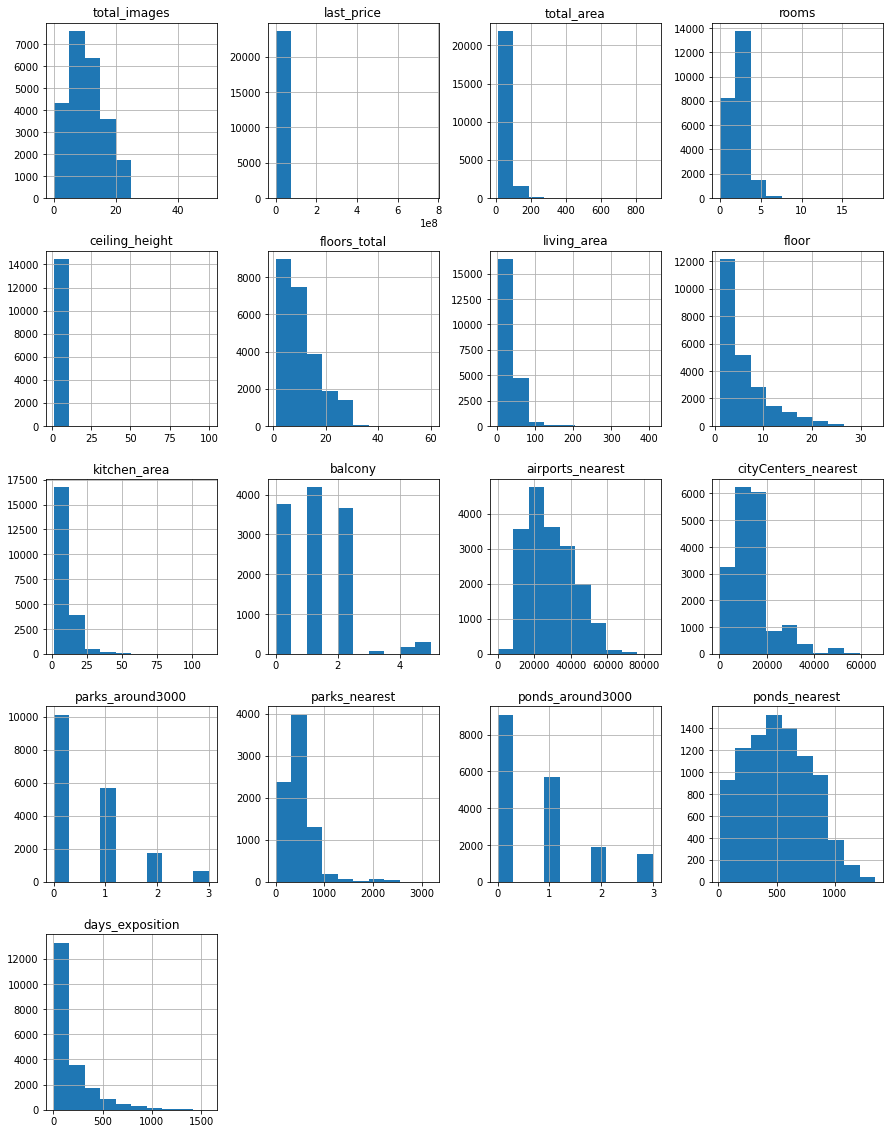

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

Посмотрим, где имеются пропуски данных.

In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

По 14 параметрам видим проблемы, бросаются в глаза большие пропуски в признаке апартаментов(20924), наличие или отсутствие балконов(11519), и наличие пропусков в данных, зависящих от карт и геолокации(последние 7 столбцов), что может говорить о проблемах с этими картами.

Изучим высоту потолков, чтобы понять на что менять пустые значения.Медианное значение по выборке (2,65м) укладывается в наиболее применяемые строительные нормы 2,5-2,7м. Но тут же мы видим странности по наличию потолков высотой 1м. и даже 100м., что явно не корректные данные и надо их исправить.

In [7]:
data.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [8]:
data.ceiling_height.unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Взглянув на уникальные значения по высоте потолков видно,что есть значение и 20,24,27 метров. Посчитаем что это ошибки ввода данных и на самом деле это например 2,0-2,4-2,7.

In [9]:
display(data.query('ceiling_height > 5 or ceiling_height <2').sort_values(by='ceiling_height'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,...,21.10,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.30,5.0,NaN,5,NaN,...,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,...,63.00,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.50,5.0,83.0,5,NaN,...,29.00,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.0,5,NaN,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.00,7.0,147.0,7,NaN,...,15.60,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0


Делаем выборку во высоте потолков, которую считаем аномально маленькой или аномально большой и заменяем эти значение на медианные

In [11]:
ceiling_height_corr = data.query('ceiling_height < 2 or 6 < ceiling_height < 20 or ceiling_height >32')

print('до обработки')#проверяем что есть в срезе
display(ceiling_height_corr['ceiling_height'])

#значения из среза меняем на медианное значение по параметру 
ceiling_height_corr['ceiling_height'] = data['ceiling_height'].median()

print('после обработки')# проверяем, что получилось
display(ceiling_height_corr['ceiling_height'])

#обработанные значения из среза по индексу вставляем в исходный датасет
data.loc[ceiling_height_corr.index,'ceiling_height'] = ceiling_height_corr['ceiling_height']


до обработки


3474       8.00
5712       1.20
5863       8.30
15061     14.00
15743      8.00
16934      1.75
17442      8.00
22309     10.30
22590      1.00
22869    100.00
Name: ceiling_height, dtype: float64

после обработки


3474     2.65
5712     2.65
5863     2.65
15061    2.65
15743    2.65
16934    2.65
17442    2.65
22309    2.65
22590    2.65
22869    2.65
Name: ceiling_height, dtype: float64

Делаем выборку по высоте потолков в интервале 20-32 метра и делим значения на 10, так как решили считать что это ошибки ввода.

In [12]:
ceiling_height_corr1 = data.query('20 <= ceiling_height <= 32')
print('до обработки')#проверяем что есть в срезе
display(ceiling_height_corr1['ceiling_height'])

#делим значения из среза на 10
ceiling_height_corr1['ceiling_height'] = data['ceiling_height']/10

print('после обработки')# проверяем, что получилось
display(ceiling_height_corr1['ceiling_height'])

#обработанные значения из среза по индексу вставляем в исходный датасет
data.loc[ceiling_height_corr1.index,'ceiling_height'] = ceiling_height_corr1['ceiling_height']


до обработки


355      25.0
3148     32.0
4643     25.0
4876     27.0
5076     24.0
5246     27.0
5669     26.0
5807     27.0
6246     25.0
9379     25.0
10773    27.0
11285    25.0
14382    25.0
17496    20.0
17857    27.0
18545    25.0
20478    27.0
20507    22.6
21377    27.5
21824    27.0
22336    32.0
22938    27.0
Name: ceiling_height, dtype: float64

после обработки


355      2.50
3148     3.20
4643     2.50
4876     2.70
5076     2.40
5246     2.70
5669     2.60
5807     2.70
6246     2.50
9379     2.50
10773    2.70
11285    2.50
14382    2.50
17496    2.00
17857    2.70
18545    2.50
20478    2.70
20507    2.26
21377    2.75
21824    2.70
22336    3.20
22938    2.70
Name: ceiling_height, dtype: float64

In [13]:
#заменяем пустые значения 'ceiling_height' на медианные по данному параметру
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [14]:
data.ceiling_height.describe()

count    23699.000000
mean         2.696862
std          0.221130
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

После обработки видим, что с потолками теперь все нормально и неадекватных выбросов нет.

Посмотрим картину по неуказанной этажности здания и этажу квартиры. Видим,что выяснить из входных данных в скольки этажном здании находиться квартира не представляется возможным.


In [15]:
df = data[['floors_total','floor']]
display(df[df['floors_total'].isnull()].head(20))

,floors_total,floor
186,NaN,4
237,NaN,1
457,NaN,12
671,NaN,8
1757,NaN,9
1930,NaN,4
2392,NaN,22
2846,NaN,15
2952,NaN,6
3031,NaN,12


Удаляем пустые строки общей этажности недвижимости, это гораздо меньше 10% общих данных и не вызовет проблем в исследовании.

In [16]:
data = data.dropna(subset = ['floors_total'])

По жилой площади странно выглядят обьекты с минимальной площадью 2м2. Всего обьектов в интервале 2-5 метров жилой площади 4шт., при этом эти объекты имеют нормальную жилую площадь.Удалим эти строки. Максимальная жилая площадь более 400 кв.м не вызывает сомнений, бывает и больше.

In [17]:
data.living_area.describe()


count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [18]:
data.query('2 <= living_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.65,17.0,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,2.65,24.0,2.0,22,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.00,8.0,3.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


In [19]:
data.drop(index=data.query('2 <= living_area < 5').index,inplace=True)

In [20]:
data.living_area.describe()

count    21739.000000
mean        34.468662
std         22.035193
min          5.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

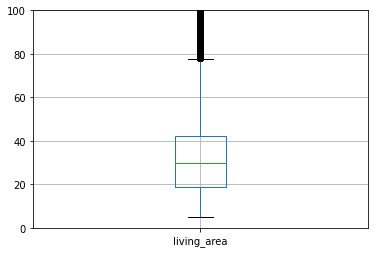

In [21]:
plt.ylim(0, 100)
data.boxplot('living_area')
plt.show()

Считаем коэффициент отношения жилой площади к общей и с помощью этого коэффициента заполняем пропуски. В начале и конце обработки выводим датафремы для проверки.

In [22]:
df = data[['total_area','living_area','kitchen_area']]
df[df.any(axis=1)].head(20)

,total_area,living_area,kitchen_area
0,108.00,51.00,25.00
1,40.40,18.60,11.00
2,56.00,34.30,8.30
3,159.00,NaN,NaN
4,100.00,32.00,41.00
5,30.40,14.40,9.10
6,37.30,10.60,14.40
7,71.60,NaN,18.90
8,33.16,15.43,8.81
9,61.00,43.60,6.50


In [23]:
liv_area_koeff = data.living_area.median()/data.total_area.median()

data['living_area'] = data['living_area'].fillna(data['total_area']*liv_area_koeff)
df = data[['living_area','total_area']]
df[df.any(axis=1)].head(20)


,living_area,total_area
0,51.000000,108.00
1,18.600000,40.40
2,34.300000,56.00
3,91.730769,159.00
4,32.000000,100.00
5,14.400000,30.40
6,10.600000,37.30
7,41.307692,71.60
8,15.430000,33.16
9,43.600000,61.00


Признак отношения к апартаментам не указан в большинстве случаев,
скорее всего жилье апартаментами не является или продавцы не понимают, 
что это такое при выставлении продажи, поэтому ставим признак "не является" 

In [24]:
data.is_apartment = data.is_apartment.fillna(False)
data.is_apartment.describe()

count     23609
unique        2
top       False
freq      23559
Name: is_apartment, dtype: object

Считаем коэффициент отношения площади кухни к общей и с помощью этого коэффициента заполняем пропуски. В начале и конце обработки выводим датафремы для проверки.


In [25]:
kitch_area_koeff = data.kitchen_area.median()/data.total_area.median()

data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*kitch_area_koeff)
df = data[['kitchen_area','total_area']]
df[df.any(axis=1)].head(20)

,kitchen_area,total_area
0,25.000,108.00
1,11.000,40.40
2,8.300,56.00
3,27.825,159.00
4,41.000,100.00
5,9.100,30.40
6,14.400,37.30
7,18.900,71.60
8,8.810,33.16
9,6.500,61.00


Будем считать что пропуски балконов означают их отсутствие, поэтому пропуски заменяем на 0

In [26]:
data.balcony = data.balcony.fillna(0)

В locality_name явных дубликатов вроде нет, но присутствуют множество неявных дубликатов, например:
- Поселок Мурино - Мурино
- Село Никольское - Никольское
- Деревня Кудрово - Кудрово
- поселок - посёлок и тп



In [27]:
set(data.locality_name)



{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'г

In [28]:
print('количество уникальных локаций:', data.locality_name.nunique())

количество уникальных локаций: 364


Сначала удаляем строки, где не указано locality_name. Исследовать неизвестно что не имеет смысла и строк мало 49шт, данных под удаление гораздо меньше 10%, что совсем не критично. 

In [29]:
data = data.dropna(subset = ['locality_name'])

Используем следующую обработку с целью разбить строковые значения наименований населенный пунктов по словам, чтобы в конечном итоге оставить только уникальное название населенного пункта, из которых мы составим  новый список из однословных названий и заменим им столбец locality_name

In [30]:
#список слов, которые будем удалять
words_to_delete= ['городской','посёлок','деревня','коттеджный','поселок','городского',
            'типа','при','железнодорожной','станции','садоводческое','некоммерческое',         
            'садовое', 'товарищество', 'село','типа']

list_to_correct = data['locality_name']#переменная - столбец locality_name, который будем корректрировать

new_list = [] #новый список куда будем вносить однословные названия населенных пунктов
 
for row in list_to_correct:
#перебираем циклом все строки в locality_name
#в переменную resultwords записываем только то слово в разделенной строке методом split,
#которое не присутствует в списке слов на удаление
    resultwords  = [word for word in str(row).split() if word not in words_to_delete]
#переменной result вместо пропуска присоединяем слово в resultwords методом append
#добавляем в конец нового списка
    result = ' '.join(resultwords)
    new_list.append(result)
   
 data['name_new'] = new_list #в столбец name_new заносим данные из списка c новыми названиями

data['locality_name'] = data['name_new'] #данные столбца locality_name меняем на новые данные в столбце 'name_new'
data.drop(['name_new'], axis = 1, inplace = True) #удаляем использованный столбец с новыми именами

In [31]:
print('количество уникальных названий после обработки:', data.locality_name.nunique())

количество уникальных названий после обработки: 305


сбросим индекс строк после удаления 

In [32]:
data.reset_index(drop=True,inplace=True)

In [33]:
print('количество дубликатов названий после обработки:' ,data.duplicated().sum())

количество дубликатов названий после обработки: 0


Пустые значения расстояния до ближайщего аэропорта заполняем медианным значением до аэропорта по локациям, незаполненные данные будут означать, что для данных локаций вообще отсутствует какая-либо информация и медианное значение невозможно определить. В этом случае оставляем пропуски в данном признаке как есть.

In [34]:
before = data.airports_nearest.isnull().sum()

for locality_name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == locality_name) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == locality_name), 'airports_nearest'].median()  

print('Пропуски в airports_nearest после обработки -->', data.airports_nearest.isnull().sum(), 'Пропуски до обработки -->', before)

Пропуски в airports_nearest после обработки --> 5431 Пропуски до обработки --> 5523


Пустые значения расстояния до сентра города, количества парков в 3 км,расстояние до ближайшего парка, количество водоемов в 3 км,расстояние до ближайшего водоема заполняем медианным значением данных величин по локациям в представленных данных. Незаполненные данные будут означать, что для данных локаций вообще отсутствует какая-либо информация и медианное значение для признака невозможно определить. В этом случае оставляем пропуски в данном признаке как есть.После каждой замены проверяем сумму пропусков до и после обработки.

In [35]:
before = data.cityCenters_nearest.isnull().sum()

for locality_name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == locality_name) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == locality_name), 'cityCenters_nearest'].median()  

print('Пропуски в cityCenters_nearest после обработки -->', data.cityCenters_nearest.isnull().sum(), 'Пропуски до обработки -->', before)

Пропуски в cityCenters_nearest после обработки --> 5431 Пропуски до обработки --> 5500


In [36]:
before = data.parks_around3000.isnull().sum()

for locality_name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == locality_name) & (data['parks_around3000'].isna()), 'parks_around3000'] = \
    data.loc[(data['locality_name'] == locality_name), 'parks_around3000'].median()

print('Пропуски в parks_around3000 после обработки -->', data.parks_around3000.isnull().sum(), 'Пропуски до обработки -->', before)

Пропуски в parks_around3000 после обработки --> 5431 Пропуски до обработки --> 5499


In [37]:
before = data.parks_nearest.isnull().sum()

for locality_name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == locality_name) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == locality_name), 'parks_nearest'].median()    

print('Пропуски в parks_nearest после обработки -->', data.parks_nearest.isnull().sum(), 'Пропуски до обработки -->', before)

Пропуски в parks_nearest после обработки --> 5985 Пропуски до обработки --> 15532


In [38]:
before = data.ponds_around3000.isnull().sum()

for locality_name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == locality_name) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = \
    data.loc[(data['locality_name'] == locality_name), 'ponds_around3000'].median()   

print('Пропуски в ponds_around3000 после обработки -->', data.ponds_around3000.isnull().sum(), 'Пропуски до обработки -->', before)

Пропуски в ponds_around3000 после обработки --> 5431 Пропуски до обработки --> 5499


In [39]:
before = data.ponds_nearest.isnull().sum()

for locality_name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == locality_name) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == locality_name), 'ponds_nearest'].median()   

print('Пропуски в ponds_nearest после обработки -->', data.ponds_nearest.isnull().sum(), 'Пропуски до обработки -->', before)

Пропуски в ponds_nearest после обработки --> 5516 Пропуски до обработки --> 14527


In [40]:
data.days_exposition = data.days_exposition.fillna(data.days_exposition.median())     
data.days_exposition.isnull().sum()

0

Проверяем что пустых значений больше нет.

In [41]:
data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5431
cityCenters_nearest     5431
parks_around3000        5431
parks_nearest           5985
ponds_around3000        5431
ponds_nearest           5516
days_exposition            0
dtype: int64

**Проверка и исправление типов данных в каждом столбце** 

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23561 entries, 0 to 23560
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23561 non-null  int64  
 1   last_price            23561 non-null  float64
 2   total_area            23561 non-null  float64
 3   first_day_exposition  23561 non-null  object 
 4   rooms                 23561 non-null  int64  
 5   ceiling_height        23561 non-null  float64
 6   floors_total          23561 non-null  float64
 7   living_area           23561 non-null  float64
 8   floor                 23561 non-null  int64  
 9   is_apartment          23561 non-null  bool   
 10  studio                23561 non-null  bool   
 11  open_plan             23561 non-null  bool   
 12  kitchen_area          23561 non-null  float64
 13  balcony               23561 non-null  float64
 14  locality_name         23561 non-null  object 
 15  airports_nearest   

 - тип данных is_apartment меняем на булевский, 
 - из формата данных обрезаем время,так как в исходных данных оно везде рано нулю, 
 - типы данных количество балконов,общее количество этажей,дни продажи, количество парков и водоемов в пределах 3 км меняем на целое число.

In [43]:
display(data['days_exposition'])

0         95.0
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23556     95.0
23557     45.0
23558     95.0
23559    602.0
23560     95.0
Name: days_exposition, Length: 23561, dtype: float64

In [44]:
data.is_apartment = data.is_apartment.astype('bool')
data.first_day_exposition = pd.to_datetime(data.first_day_exposition, format='%Y-%m-%d')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23561 entries, 0 to 23560
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23561 non-null  int64         
 1   last_price            23561 non-null  float64       
 2   total_area            23561 non-null  float64       
 3   first_day_exposition  23561 non-null  datetime64[ns]
 4   rooms                 23561 non-null  int64         
 5   ceiling_height        23561 non-null  float64       
 6   floors_total          23561 non-null  int64         
 7   living_area           23561 non-null  float64       
 8   floor                 23561 non-null  int64         
 9   is_apartment          23561 non-null  bool          
 10  studio                23561 non-null  bool          
 11  open_plan             23561 non-null  bool          
 12  kitchen_area          23561 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

•	цена одного квадратного метра

In [45]:
data['sqm_price'] = data['last_price']/data['total_area']

•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [46]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek

•	месяц публикации объявления

In [47]:
data['month_exposition'] = data['first_day_exposition'].dt.month

•	год публикации объявления

In [48]:
data['year_exposition'] = data['first_day_exposition'].dt.year

•	тип этажа квартиры (значения — «первый», «последний», «другой»)

In [49]:
data['floor_type'] = np.where(data['floor'] == 1,'Первый', np.where(data['floor'] == data['floors_total'], 'Последний', 'Другой'))


•	расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [50]:
data['center_distance_km'] = round(data['cityCenters_nearest']/1000)

Проверяем соответствие типов данных и наличие новых добавленных столбцов

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23561 entries, 0 to 23560
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23561 non-null  int64         
 1   last_price            23561 non-null  float64       
 2   total_area            23561 non-null  float64       
 3   first_day_exposition  23561 non-null  datetime64[ns]
 4   rooms                 23561 non-null  int64         
 5   ceiling_height        23561 non-null  float64       
 6   floors_total          23561 non-null  int64         
 7   living_area           23561 non-null  float64       
 8   floor                 23561 non-null  int64         
 9   is_apartment          23561 non-null  bool          
 10  studio                23561 non-null  bool          
 11  open_plan             23561 non-null  bool          
 12  kitchen_area          23561 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

 - #### Общая площадь

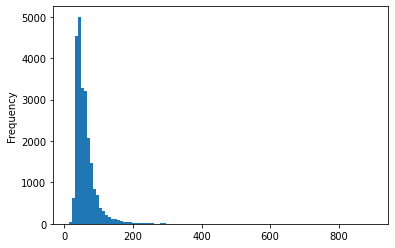

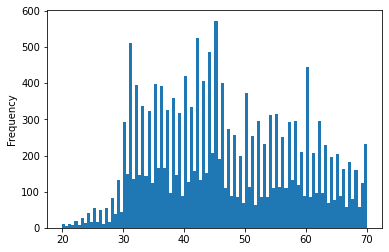

In [52]:
data.total_area.plot(kind='hist', bins=100)
plt.show()
data.total_area.plot(kind='hist', bins=100, range=(20,70))
plt.show()


Большинство обьектов недвижимости в диапазоне общей площади 30-70 м2. Выделяются стандартные значения ~33м2, ~46м2, ~62м2, что сокрее всего соответствует 1,2,3 комнатным квартирам которых на рынке большинство.

- #### Жилая площадь

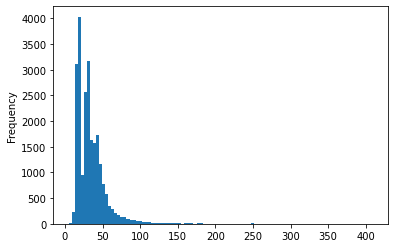

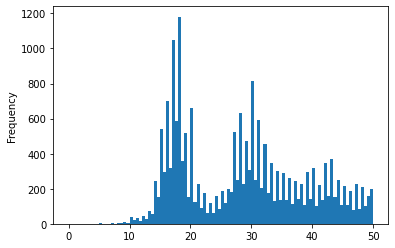

count    23561.000000
mean        34.626561
std         22.397816
min          5.000000
25%         19.000000
50%         30.000000
75%         42.115385
max        409.700000
Name: living_area, dtype: float64

In [53]:
data.living_area.plot(kind='hist', bins=100)
plt.show()
data.living_area.plot(kind='hist', bins=100, range=(0,50))
plt.show()
data.living_area
data.living_area.describe()

По жилой площади основное количество квартир находится в диапазоне 19-42м2, выбиваются на этом фоне обьекты площадью 16-18м2 (вероятно комнаты в коммуналках,общежитиях или студии) и квартиры с жилой площадью 30м2.

- #### Площадь кухни

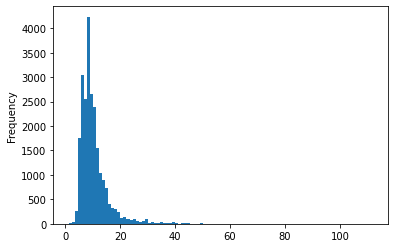

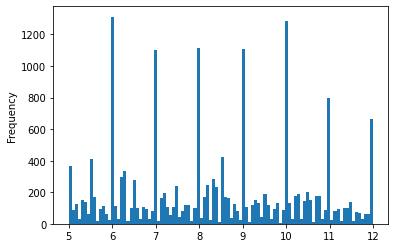

In [54]:
data.kitchen_area.plot(kind='hist', bins=100)
plt.show()
data.kitchen_area.plot(kind='hist', bins=100, range=(5,12))
plt.show()

В площади кухни лидирует стандартная кухня 6 и 10м2, потом 7м2  8м2 и 9м2

- #### Цена квартиры

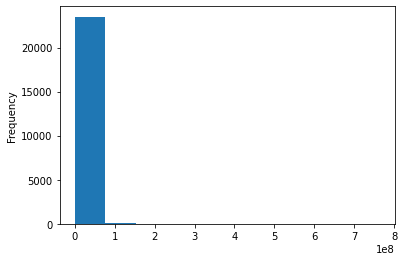

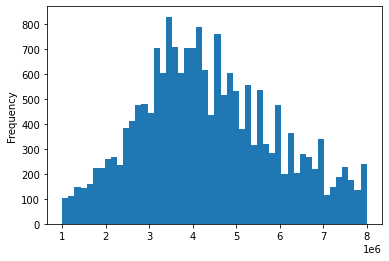

In [55]:
data.last_price.plot(kind='hist')
plt.show()
data.last_price.plot(kind='hist',bins=50, range=(1000000,8000000))
plt.show()

Больше всего квартир на рынке Санкт-Петербурга и области стоят 3,5 млн рублей.

- #### Количество комнат

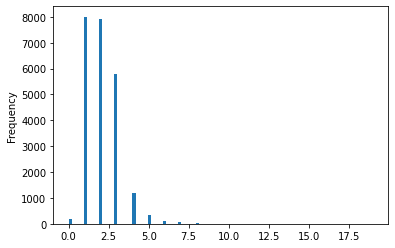

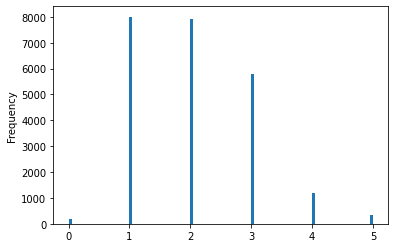

In [56]:
data.rooms.plot(kind='hist', bins=100)
plt.show()
data.rooms.plot(kind='hist', bins=100, range=(0,5))
plt.show()

Больше всего на продажу выставлены 1,2,3х комнатные квартиры в порядке убывания

- #### Высота потолков

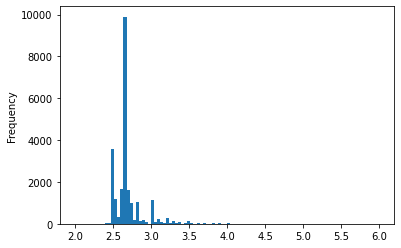

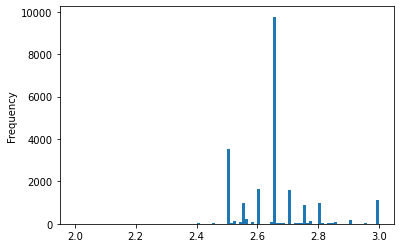

In [57]:
data.ceiling_height.plot(kind='hist', bins=100)
plt.show()
data.ceiling_height.plot(kind='hist', bins=100, range=(2,3))
plt.show()

Недвижимость в продаже в основном со стандартной высотой потолков 2,7м, на втором месте высота 2,5м

- #### Этажность квартир

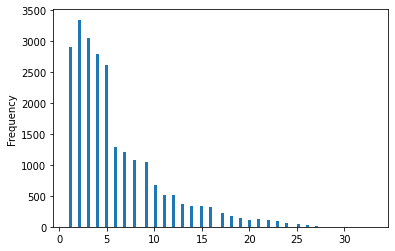

In [58]:
data.floor.plot(kind='hist', bins=100)
plt.show()

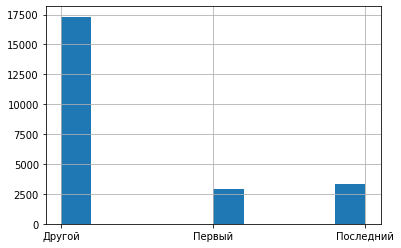

In [59]:
data.floor_type.hist();

В основном продаются квартиры между первым и последним этажами.

- #### Этажность домов, где продаются квартиры

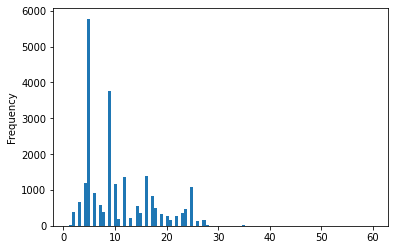

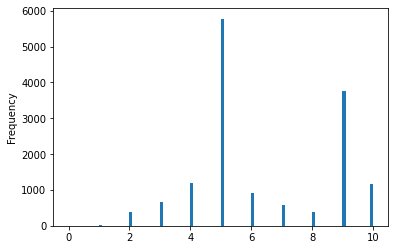

In [60]:
data.floors_total.plot(kind='hist', bins=100)
plt.show()
data.floors_total.plot(kind='hist', bins=100, range=(0,10))
plt.show()

Наибольшее количество продаваемых квартир в 5ти и 9ти этажных домах.

- #### Расстояние квартир до центра города

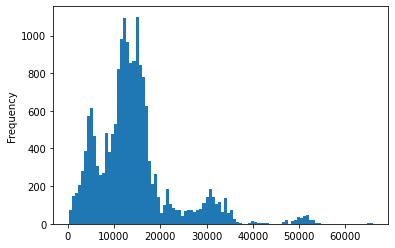

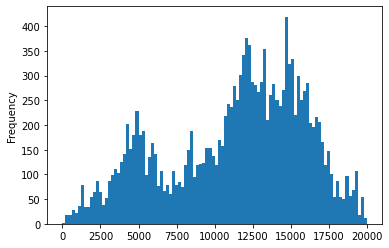

In [61]:
data.cityCenters_nearest.plot(kind='hist', bins=100)
plt.show()
data.cityCenters_nearest.plot(kind='hist', bins=100, range=(0,2e04))
plt.show()

В среднем большинство квартир находиться от центра города в диапазоне 11-13 км.

- #### Расстояние до парков 

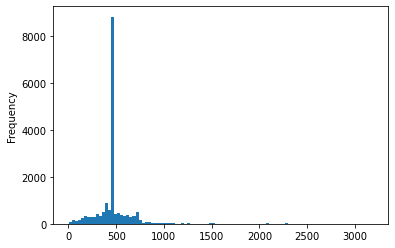

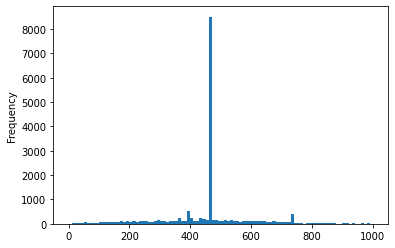

In [62]:
data.parks_nearest.plot(kind='hist', bins=100)
plt.show()
data.parks_nearest.plot(kind='hist', bins=100, range=(0,1000))
plt.show()

Для большинства квартир с предоставленными данными по геолокации парки в шаговой доступности 450-500 метров. 

- #### Расстояние до водоемов

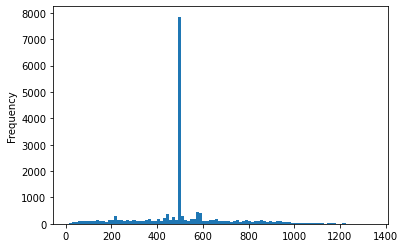

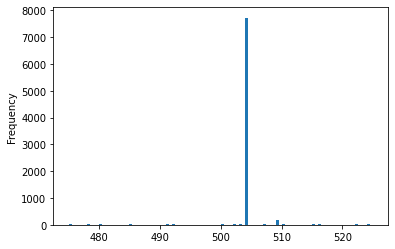

In [63]:
data.ponds_nearest.plot(kind='hist', bins=100)
plt.show()
data.ponds_nearest.plot(kind='hist', bins=100, range=(475,525))
plt.show()

Для большинства квартир где имеются предоставленные данные геолокации имеются водоемы в радиусе 500м(выброс на диаграмме). 

- #### День недели, когда квартиры выставляются на продажу

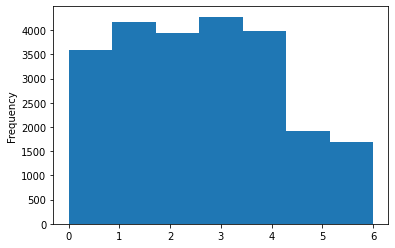

In [64]:
data.weekday_exposition.plot(kind='hist', bins=7)
plt.show()

Квартиры выставляются на продажу наиболее активно в будние дни и реже в выходные. 

- #### Месяц выставления квартир на продажу

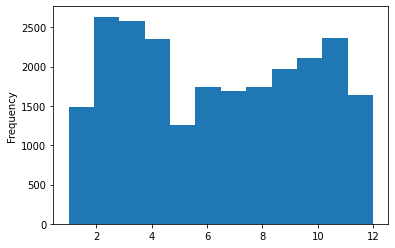

In [65]:
data.month_exposition.plot(kind='hist', bins=12)
plt.show()

Квартиры наиболее реже выставляются на продажу в мае,январе и декабре и наиболее чаще в феврале,марте,апреле,ноябре.

- #### Количество дней продажи квартиры.

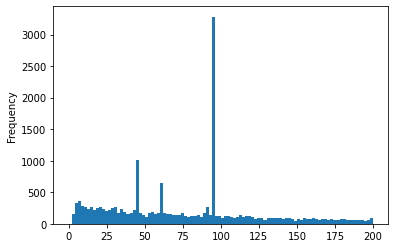

count    23561.000000
mean       169.204703
std        206.512048
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [66]:
data.days_exposition.plot(kind='hist', bins=100, range=(0,200))
plt.show()
data.days_exposition.describe()

Есть квартиры которые продаются годами, есть за 1 день, обычно квартира продается за 3 месяца (95 дней)

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.
Из построенных ниже графиков корреляции видно что линейная зависимость цены обьекта недвижимости слабо выражена и падает в следующем порядке:
       


Коэффициент корреляции: 0.6535862299198448


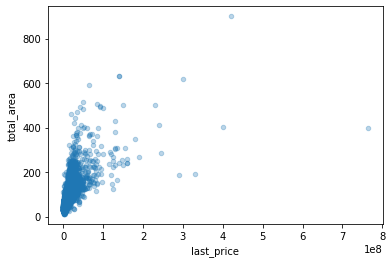

In [67]:
print('Коэффициент корреляции:', data['last_price'].corr(data['total_area']))
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
plt.show()

Зависимость между ценой и общей площадью квартиры имеется,но не ярко выражена.

Коэффициент корреляции: 0.5865295019578675


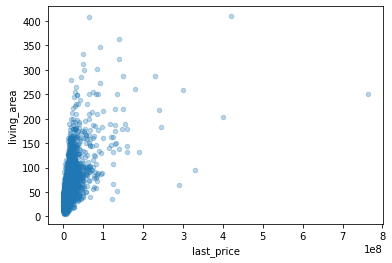

In [68]:
print('Коэффициент корреляции:', data['last_price'].corr(data['living_area']))
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3)
plt.show()

Зависимость между ценой и жилой площадью квартиры имеется,но не ярко выражена и она ниже чем зависимотсть от общей площади.

Коэффициент корреляции: 0.5146264631427829


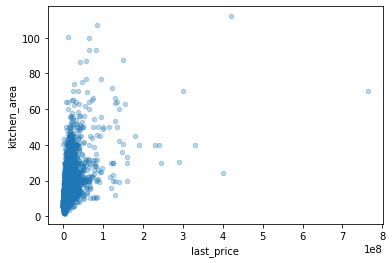

In [69]:
print('Коэффициент корреляции:', data['last_price'].corr(data['kitchen_area']))
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3)
plt.show()

Зависимость между ценой и площадью кухни квартиры имеется,но она слабая и еще ниже чем зависимость от общей и жилой  площади.

Коэффициент корреляции: 0.3632195100156262


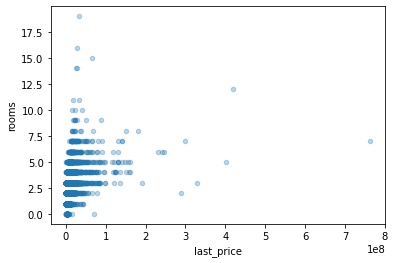

In [70]:
print('Коэффициент корреляции:', data['last_price'].corr(data['rooms']))

data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)
plt.show()

Зависимость между ценой и числом комнат квартиры имеется,но она слабая и еще ниже чем зависимость от общей,жилой и кухонной площадей.

**Используем  метод pyplot для построения другого типа диаграммы с нечисловыми параметрами**


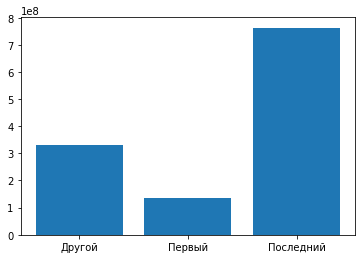

In [71]:
plt.bar(data['floor_type'],data['last_price']);

На диаграмме видна зависимость от этажности квартиры. Традиционно квартиры на первом этаже самые дешевые, самые дорогие на последнем этаже, может быть влияет вид,тишина чистый воздух или пентхаузы на последних этажах стали популярны?

Коэффициент корреляции: 0.0015488975857827962


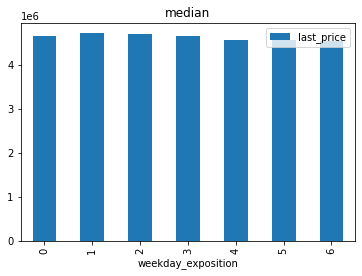

In [72]:
print('Коэффициент корреляции:', data['last_price'].corr(data['weekday_exposition']))
data.pivot_table(index='weekday_exposition',values='last_price',aggfunc='median').plot(y='last_price', kind='bar', title='median')
plt.show()

Зависимости цены квартиры от дня недели выставления на продажу нет.

Коэффициент корреляции: 0.002403591365699242


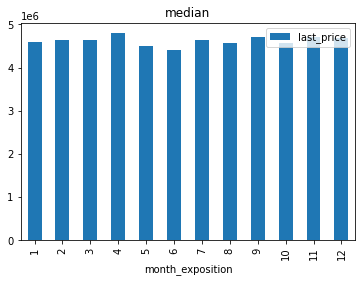

In [73]:
print('Коэффициент корреляции:', data['last_price'].corr(data['month_exposition']))
data.pivot_table(index='month_exposition',values='last_price',aggfunc='median').plot(y='last_price', kind='bar', title='median')
plt.show()

Зависимости цены квартиры от месяца выставления на продажу нет.

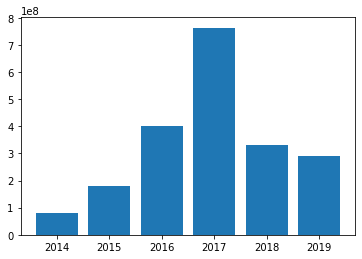

In [74]:
plt.bar(data['year_exposition'], data['last_price'])
plt.show()

Видно что цены на квартриры с 2014 года показывали непрерывной рост достигший максимума в 2017 году, после этого цены упали и в 18,19 годах оставались приблизительно на одном уровне. Посмотрим как выглядит тот же график по медианным значениям, представленным ниже. Здесь мы видим отсутствие зависимости.

Коэффициент корреляции: -0.04236853582027851


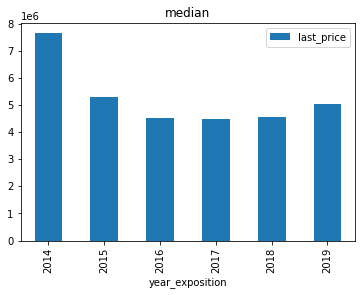

In [75]:
print('Коэффициент корреляции:', data['last_price'].corr(data['year_exposition']))
data.pivot_table(index='year_exposition',values='last_price',aggfunc='median').plot(y='last_price', kind='bar', title='median')
plt.show()

С помощью сводной таблицы наглядно посмотрим среднюю цену квадратного метра 10 локаций с наиболее частыми обьявлениями о продаже. Чаще всего продают квартиры естественно во второй столице России Санкт-Петербурге и цена квадратного метра здесь естественно выше всех. В ценовой категории на фоне остальных городов Ленинградской области выделяется Пушкин,так как это исторический,культурный и туристический центр. Самая низкая стоимость кв.м. из 10 наиболее продаваемых локаций в Выборге.

In [76]:
sqm_price_by_local = data.pivot_table(index='locality_name', values='sqm_price', aggfunc={'mean','count'}).sort_values(by='count',ascending=False)
print(sqm_price_by_local.head(10))

                 count           mean
locality_name                        
Санкт-Петербург  15648  114846.295836
Мурино             585   86015.025069
Кудрово            470   95260.846171
Шушары             439   78551.344545
Всеволожск         398   68654.473986
Пушкин             369  103125.819291
Колпино            338   75424.579098
Парголово          327   90175.913458
Гатчина            307   68746.146763
Выборг             237   58141.909153


С помощью сводной таблицы выделим квартиры в Санкт-Петербурге (locality_name = Санкт-Петербург) и вычислим среднюю цену по километрам удаленности от центра города. 

                            mean
center_distance_km              
0.0                 3.144912e+07
1.0                 2.120672e+07
2.0                 1.778832e+07
3.0                 1.113739e+07
4.0                 1.330428e+07
5.0                 1.445600e+07
6.0                 1.525795e+07
7.0                 1.479526e+07
8.0                 9.949111e+06
9.0                 6.956583e+06
10.0                6.500434e+06
11.0                6.228108e+06
12.0                6.197926e+06
13.0                6.078772e+06
14.0                5.625173e+06
15.0                5.876323e+06
16.0                5.373131e+06
17.0                5.299496e+06
18.0                5.091331e+06
19.0                5.051410e+06
20.0                5.951465e+06
21.0                5.493469e+06
22.0                5.415524e+06
23.0                4.985376e+06
24.0                3.854430e+06
25.0                4.052840e+06
26.0                4.014287e+06
27.0                8.300000e+06
28.0      

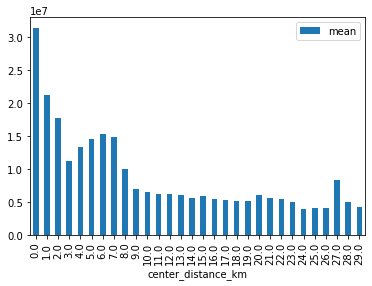

In [77]:
sqm_price_spb_center_km = data.loc[data['locality_name']=='Санкт-Петербург'].pivot_table(index='center_distance_km', values='last_price', aggfunc={'mean'})
print(sqm_price_spb_center_km)
sqm_price_spb_center_km.plot(y='mean', kind='bar')
plt.show()

Традиционно, чем ближе к центру тем недвижимость дороже, в данном случае Санкт-Петербург не исключение. В центре города квартиры стоят более 30 млн.руб, а в 3х км. можно купить в 3 раза дешевле. На дистанции 5-7 км от центра города, наблюдается опять рост цен на квартиры, который потом переходит в падение в зависимости от удаленности. При всем при этом, в 27 километрах от центра имеется недвижимость по такой же цене как в 8 км от центра, это вероятно какой-то перспективный или респектабельный район.

### Общий вывод

Для исследования продаж недвижимости на платформа ЯНДЕКС и ответа на поставленные вопросы были проделаны следующие этапы:

 - Изучена входящая информация.
 
 - Проведена предобработка данных, в ходе которой были: 
   - обнаружены пропуски информации в 14 столбцах. Пропуски данных в большинстве случаев были заменены на медианные значения по конкретным столбцам, за исключением этажности (замена на 1 - одноэтажное здание), наличие балконов (замена на 0 - отсутствие балкона), признак принадлежности к апартаментам (замена на False - не апартаменты). 49 строк с пропусками в локации были удалены из данных.
   - Выявлены и исправлены аномальные значения: высота потолков приведена к адекватным значениям, удалены строки с аномально малыми значениями жилой площади.
   - Выявлены и удалены неявные дубликаты в названиях населенных пунктах.
   - Проверены и исправлены типы данных в каждом столбце.
 - Добавлены новые столбцы с исходную таблицу данных для более глубокого анализа в соответсвии с заданием.
 - Проведен исследовательский анализ данных, который показал:
   - Большинство обьектов недвижимости в диапазоне общей площади 30-70 м2. Выделяются стандартные значения ~33м2, ~46м2, ~62м2, что сокрее всего соответствует 1,2,3 комнатным квартирам, которых на рынке большинство.
   - По жилой площади основное количество квартир находится в диапазоне 19-42м2, выбиваются на этом фоне обьекты площадью 16-18м2 (вероятно комнаты в коммуналках,общежитиях или студии) и квартиры с жилой площадью 30м2.
   - В площади кухни лидирует стандартная кухня 9м2.
   - Больше всего квартир на рынке Санкт-Петербурга и области стоят 3,5 млн рублей.
   - Больше всего на продажу выставлены 1,2,3х комнатные квартиры в порядке убывания.
   - Недвижимость в продаже в основном со стандартной высотой потолков 2,7м, на втором месте высота 2,5м
   - В основном продаются квартиры между первым и последним этажами.
   - Наибольшее количество продаваемых квартир в 5ти и 9ти этажных домах.  
   - В среднем большинство квартир находиться от центра города в диапазоне 11-13 км.
   - Парки и водоемы для большинства квартир находяться в шаговой доступности 400-500м.
   - Квартиры выставляются на продажу наиболее активно в будние дни и реже в выходные.
   - Квартиры наиболее реже выставляются на продажу в мае,январе и декабре и наиболее чаще в феврале,марте,апреле,ноябре.
   - Есть квартиры которые продаются годами, есть за 1 день, обычно квартира продается за 3 месяца (95 дней)
 - Для поиска факторов влияющих на зависимость цены обьектат были построены графики взаимозависимостей цены от заданных параметров и сделан вывод:
    - линейная зависимость цены обьекта недвижимости слабо выражена и падает по параметрам  в следующем порядке:
      общая площадь (0,65), жилая площадь (0,54), площадь кухни (0,44), количество комнат (0,36)
    - есть зависимость от этажа квартиры.Традиционно квартиры на первом этаже самые дешевые, самые дорогие получились на последнем этаже, может быть влияет вид,тишина чистый воздух или пентхаузы на последних этажах стали популярны.
    - Зависимости цены квартиры от дня недели,месяца и года выставления на продажу нет.
 - Дополнительный анализ по 10 самым популярным локациям продажи, показал:
    - Чаще всего продают квартиры естественно во второй столице России Санкт-Петербурге и цена квадратного метра здесь естественно выше всех. В ценовой категории на фоне остальных городов ЛО выделяется Пушкин,так как это исторический,культурный и туристический центр ЛО. Самая низкая стоимость кв.м. из 10 наиболее продаваемых локаций в Выборге.
 - Анализ стоимости жилья по километражу от центра Санкт- Птербурга показал:
    - Традиционно, чем ближе к центру тем недвижимость дороже, за редким исключением некоторых престижных городских локаций.
 
    
    
    